In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import re

In [ ]:
data_dtm = pd.read_pickle("data/preprocessed/data_dtm.pkl")

In [ ]:
data_clean = pd.read_csv("data/preprocessed/corpus.csv")
data_clean.drop("title", axis=1, inplace=True)
data_clean

,category,body
0,business,quarterly profits at us media giant timewarne...
1,business,the dollar has hit its highest level against ...
2,business,the owners of embattled russian oil giant yuk...
3,business,british airways has blamed high fuel prices f...
4,business,shares in uk drinks and food firm allied dome...
...,...,...
2220,tech,bt is introducing two initiatives to help bea...
2221,tech,computer users across the world continue to i...
2222,tech,a new european directive could put software w...
2223,tech,the man making sure us computer networks are ...


In [ ]:
data_dtm = data_dtm.transpose()

In [ ]:
data_dtm

category,business,business,business,business,business,business,business,business,business,business,...,tech,tech,tech,tech,tech,tech,tech,tech,tech,tech
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
aaas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aadc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zurich,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zurichs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zutons,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zvonareva,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def filter_top_50_words(df):
    top_dict = {}
    for c in set(df.columns):
        top = df[c].sum(axis=1).sort_values(ascending=False).head(50)
        top_dict[c] = list(zip(top.index, top.values))
    return top_dict

In [ ]:
top_dict = filter_top_50_words(data_dtm)

In [ ]:
for category, top_words in top_dict.items():
    print(category)
    print(" ".join([top_word[0] for top_word in top_words][:20]))
    print("-"*20)

entertainment
said film best music years new awards year award won director number star actor films band mr uk british people
--------------------
sport
said game win england world time players play just cup new good team second match wales club year ireland set
--------------------
tech
said people mr new technology users mobile games music use software digital make net like online year phone game computer
--------------------
business
said mr year market new growth company economy economic sales firm bank government oil years shares prices chief business firms
--------------------
politics
said mr government labour people election party blair new minister told public brown plans prime uk howard say secretary tax
--------------------


In [ ]:
from collections import Counter

In [ ]:
words = []
for category in set(data_dtm.columns):
    top_words = [word[0] for word in top_dict[category]]
    for w in top_words:
        words.append(w)

In [ ]:
most_common_words = Counter(words).most_common()
similar_words = []
for common in most_common_words:
    if common[1] > 2:
        similar_words.append(common[0])

In [ ]:
similar_words

['said',
 'new',
 'year',
 'time',
 'years',
 'mr',
 'uk',
 'people',
 'just',
 'make',
 'told',
 'world',
 'like',
 'added']

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union(similar_words)

def convert_to_data_dtm(stop_words, data_clean):
    cv = CountVectorizer(stop_words=stop_words, max_features=10000)
    data_cv = cv.fit_transform(data_clean.body)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
    data_dtm.index = data_clean.category
    return data_cv, data_dtm

data_cv, data_dtm = convert_to_data_dtm(stop_words, data_clean)

In [ ]:
data_dtm.to_pickle("data/preprocessed/stop_words_dtm.pkl")

In [ ]:
from wordcloud import WordCloud

def generate_word_cloud(stop_words, data_dtm):
    wc = WordCloud(
        stopwords=stop_words, 
        background_color='white', 
        width=700,
        height=600,
        colormap="Dark2", 
        random_state=42
        )
    figure = plt.figure(figsize=(15,10))
    for idx, category in enumerate(set(data_dtm.transpose().columns)):
        words = data_dtm.transpose()[category].sum(axis=1)
        cloud = wc.generate_from_frequencies(words.to_dict())
        plt.subplot(2,3,idx+1)
        plt.imshow(cloud, interpolation='bilinear')
        plt.title(category)
        plt.axis("off")
    plt.show()

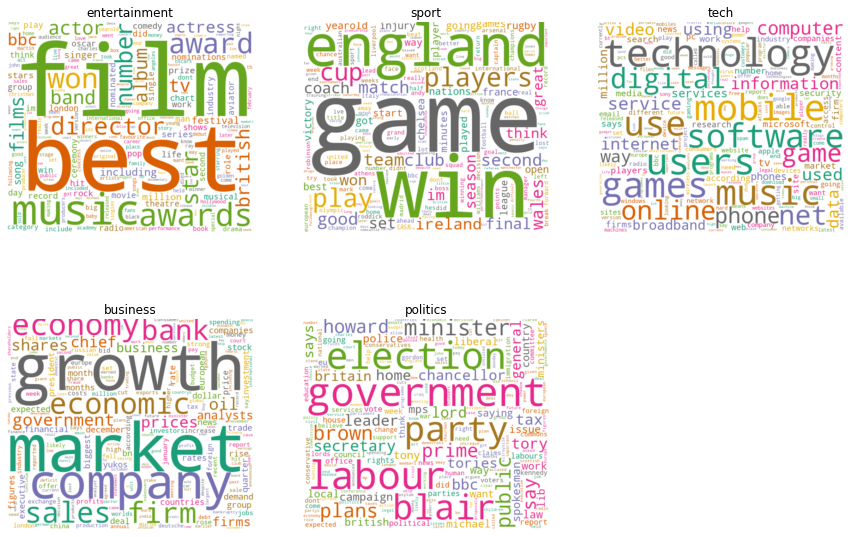

In [ ]:
generate_word_cloud(stop_words, data_dtm)

### Findings
1. From the wordcloud it is clear that our data is indded giving everything related to their categories.
2. Here we can see economy, ecomonic are two words which can be converted to one for best results since they both means same for our model
3. Some nouns like Country name are distincting categories, which shouldn't be the case, so we need to remove that

In [ ]:
!pip install country-list

In [ ]:
import country_list
countries = dict(country_list.countries_for_language('en'))
countries = [country.lower() for country in list(countries.values())]
countries.append("england")
countries.append("wales")

In [ ]:
stop_words = stop_words.union(countries)

In [ ]:
data_cv, data_dtm = convert_to_data_dtm(stop_words, data_clean)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['africa', 'african', 'american', 'antigua', 'arab', 'arabia', 'barbuda', 'barthélemy', 'bissau', 'bosnia', 'bouvet', 'brazzaville', 'british', 'burkina', 'burma', 'caicos', 'caledonia', 'cape', 'caribbean', 'cayman', 'central', 'christmas', 'city', 'cocos', 'congo', 'cook', 'costa', 'côte', 'dominican', 'el', 'emirates', 'equatorial', 'falkland', 'faroe', 'faso', 'french', 'futuna', 'grenadines', 'guiana', 'heard', 'helena', 'herzegovina', 'hong', 'indian', 'island', 'islands', 'isle', 'ivoire', 'jan', 'keeling', 'kingdom', 'kinshasa', 'kitts', 'kong', 'korea', 'lanka', 'leone', 'leste', 'lucia', 'maarten', 'macao', 'macedonia', 'man', 'mariana', 'marino', 'marshall', 'martin', 'mayen', 'mcdonald', 'miquelon', 'myanmar', 'nevis', 'norfolk', 'north', 'northern', 'ocean', 'outlying'

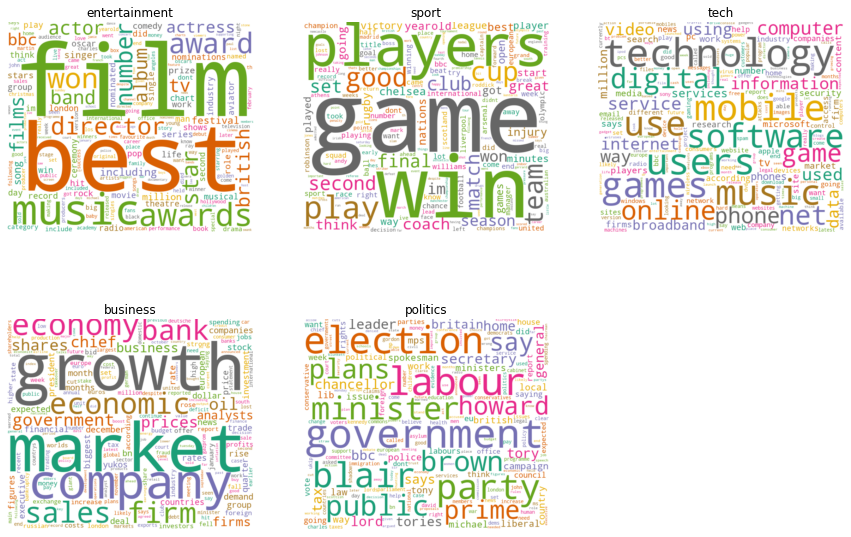

In [ ]:
generate_word_cloud(stop_words, data_dtm)

### Stemming

In [ ]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bimal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bimal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bimal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def stem_sentence(sentence):
    words = word_tokenize(sentence)
    stemmed_words = []
    stemmer = SnowballStemmer(language="english", ignore_stopwords=True)
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return " ".join(stemmed_words)

In [ ]:
# data_clean.body = data_clean.body.apply(stemm)
def lemmatize_sentence(sentence):
    words = word_tokenize(sentence)
    lematized_words = []
    lematizer = WordNetLemmatizer()
    for word in words:
        lematized_words.append(lematizer.lemmatize(word))
    return " ".join(lematized_words)

In [ ]:
data_clean_stem = data_clean.copy()
data_clean_lemm = data_clean.copy()

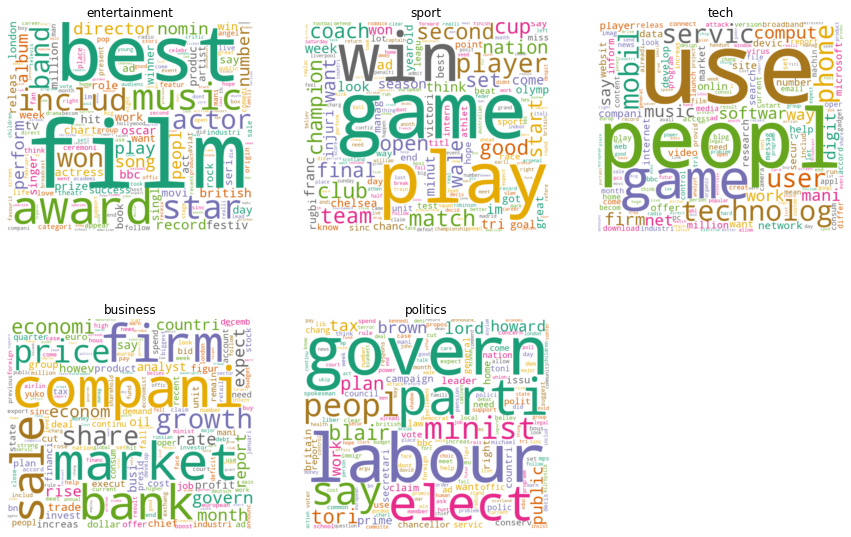

In [ ]:
data_clean_stem.body = data_clean_stem.body.apply(stem_sentence)
data_cv_stem, data_dtm_stem = convert_to_data_dtm(stop_words, data_clean_stem)
generate_word_cloud(stop_words, data_dtm_stem)

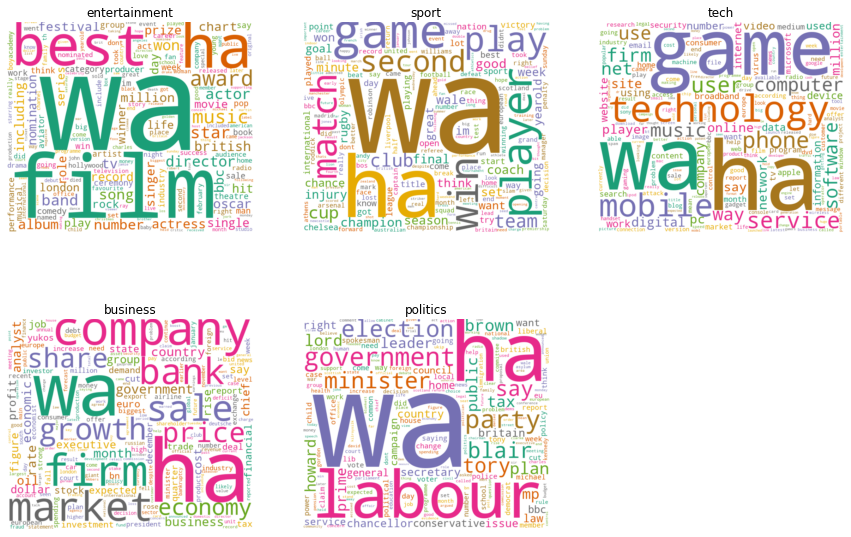

In [ ]:
data_clean_lemm.body = data_clean_lemm.body.apply(lemmatize_sentence)
data_cv_lemm, data_dtm_lemm = convert_to_data_dtm(stop_words, data_clean_lemm)
generate_word_cloud(stop_words, data_dtm_lemm)

In [ ]:
data_dtm

,aaa,aaas,aaron,abandoned,abandoning,abba,abbas,abbasi,abbott,abc,...,zealand,zeeuw,zen,zero,zhang,zombie,zombies,zone,zones,zurich
category,,,,,,,,,,,,,,,,,,,,,
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tech,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sum_df = pd.DataFrame()
for category in set(data_dtm.transpose()):
    sum_dtm = data_dtm.transpose()[category].sum(axis=1)
    sum_df[category] = sum_dtm

sum_df

,entertainment,sport,tech,business,politics
aaa,0,5,1,0,0
aaas,0,15,0,0,0
aaron,0,4,1,0,0
abandoned,3,2,0,4,6
abandoning,1,0,1,3,2
...,...,...,...,...,...
zombie,3,0,2,0,0
zombies,0,0,7,0,0
zone,1,5,3,7,3
zones,0,0,2,3,0


In [ ]:
total_words = {
    "entertainment": [],
    "sport" :[],
    "tech": [],
    "business": [],
    "politics" : []
}

unique_words = total_words.copy()

drop_zero = lambda column: None if column == 0 else column

In [ ]:
for category in total_words.keys():
    total_words[category] = list(sum_df[category].apply(drop_zero).dropna().astype("int").index)

In [ ]:
for category in total_words.keys():
    for word in total_words[category]:
        categories = list(total_words.keys())
        categories.remove(category)
        for cat in categories:
            if word not in total_words[cat]:
                unique_words[category].append(word)

In [ ]:
total_words = {category: len(total_words[category]) for category in total_words.keys()}
total_words

{'entertainment': 5971,
 'sport': 5710,
 'tech': 6490,
 'business': 6160,
 'politics': 6370}

In [ ]:
unique_words = {category: len(set(unique_words[category])) for category in unique_words.keys()}

In [ ]:
unique_words

{'entertainment': 3633,
 'sport': 3372,
 'tech': 4152,
 'business': 3822,
 'politics': 4032}

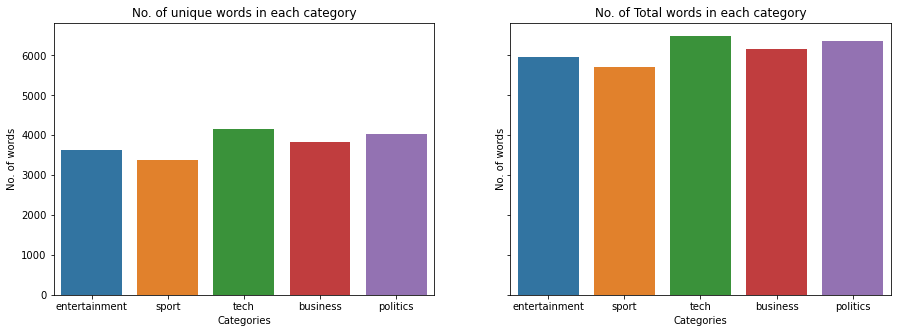

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],x = list(unique_words.keys()),y = list(unique_words.values()))
axes[0].set_title("No. of unique words in each category")
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("No. of words")


sns.barplot(ax=axes[1],x = list(total_words.keys()),y = list(total_words.values()))
axes[1].set_title("No. of Total words in each category")
axes[1].set_xlabel("Categories")
axes[1].set_ylabel("No. of words")
plt.show()

In [ ]:
pickle.dump(data_dtm,open("data/preprocessed/final_data_dtm.pkl", "wb"))